In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
covid_sc = pd.read_csv('sc.csv')

In [3]:
covid_sc

,Day Week Ends On,Sort County x Week,County,Count Confirmed Cases Suppressed if 1-4,Count Probable Cases Suppressed if 1-4,Count Hospitalized Cases Suppressed if 1-4,Count Deceased Cases Suppressed if 1-4
0,3/21/2020 12:00:00 AM,1,Abbeville,<5,<5,<5,NaN
1,3/28/2020 12:00:00 AM,2,Abbeville,<5,<5,<5,NaN
2,4/4/2020 12:00:00 AM,3,Abbeville,<5,<5,<5,NaN
3,4/11/2020 12:00:00 AM,4,Abbeville,<5,<5,<5,NaN
4,4/18/2020 12:00:00 AM,5,Abbeville,8,<5,<5,NaN
...,...,...,...,...,...,...,...
4197,11/20/2021 12:00:00 AM,4198,York,296,87,7,<5
4198,11/27/2021 12:00:00 AM,4199,York,236,73,9,NaN
4199,12/4/2021 12:00:00 AM,4200,York,424,106,8,<5
4200,12/11/2021 12:00:00 AM,4201,York,472,155,22,<5


In [4]:
covid_sc['Day Week Ends On'] = pd.to_datetime(covid_sc['Day Week Ends On'])

In [5]:
most_recent = covid_sc['Day Week Ends On'].max()

In [6]:
most_recent_data = covid_sc.loc[covid_sc['Day Week Ends On'] == most_recent]

In [7]:
most_recent_data

,Day Week Ends On,Sort County x Week,County,Count Confirmed Cases Suppressed if 1-4,Count Probable Cases Suppressed if 1-4,Count Hospitalized Cases Suppressed if 1-4,Count Deceased Cases Suppressed if 1-4
87,2021-12-18,88,Abbeville,39,21,<5,NaN
179,2021-12-18,180,Aiken,87,76,9,<5
263,2021-12-18,264,Allendale,5,<5,<5,NaN
356,2021-12-18,357,Anderson,297,122,8,6
445,2021-12-18,446,Bamberg,11,<5,<5,NaN
534,2021-12-18,535,Barnwell,10,7,<5,NaN
627,2021-12-18,628,Beaufort,126,64,<5,<5
719,2021-12-18,720,Berkeley,167,80,8,<5
808,2021-12-18,809,Calhoun,5,<5,<5,NaN
902,2021-12-18,903,Charleston,340,175,7,<5


In [8]:
usa_counties = geopandas.read_file('cb_2017_us_county_20m/cb_2017_us_county_20m.shp')

In [9]:
sc_counties = usa_counties.loc[usa_counties['STATEFP'] == '45']

In [10]:
sc_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
35,45,077,01248015,0500000US45077,45077,Pickens,06,1285538264,40609723,"POLYGON ((-82.94360 34.98815, -82.89750 35.056..."
103,45,059,01248009,0500000US45059,45059,Laurens,06,1848783527,25949287,"POLYGON ((-82.31400 34.48400, -82.23613 34.535..."
192,45,063,01244251,0500000US45063,45063,Lexington,06,1810553251,151957530,"POLYGON ((-81.47197 34.07655, -81.39412 34.071..."
194,45,011,01247983,0500000US45011,45011,Barnwell,06,1420294943,23008120,"POLYGON ((-81.76251 33.19727, -81.74252 33.208..."
198,45,023,01247988,0500000US45023,45023,Chester,06,1503893316,14261786,"POLYGON ((-81.45630 34.79252, -81.47845 34.821..."


In [11]:
merge = pd.merge(left=sc_counties[['geometry', 'NAME']], 
                 right=most_recent_data, 
                 left_on='NAME', 
                 right_on='County',).drop(columns=['NAME'])

In [12]:
merge.head()

,geometry,Day Week Ends On,Sort County x Week,County,Count Confirmed Cases Suppressed if 1-4,Count Probable Cases Suppressed if 1-4,Count Hospitalized Cases Suppressed if 1-4,Count Deceased Cases Suppressed if 1-4
0,"POLYGON ((-82.94360 34.98815, -82.89750 35.056...",2021-12-18,3562,Pickens,212,22,7,8
1,"POLYGON ((-82.31400 34.48400, -82.23613 34.535...",2021-12-18,2738,Laurens,71,48,<5,<5
2,"POLYGON ((-81.47197 34.07655, -81.39412 34.071...",2021-12-18,2923,Lexington,326,164,10,<5
3,"POLYGON ((-81.76251 33.19727, -81.74252 33.208...",2021-12-18,535,Barnwell,10,7,<5,NaN
4,"POLYGON ((-81.45630 34.79252, -81.47845 34.821...",2021-12-18,1085,Chester,40,32,<5,NaN


In [13]:
# Convert confirmed case columns integers
merge['Count Confirmed Cases Suppressed if 1-4'] = merge['Count Confirmed Cases Suppressed if 1-4'].astype(int)

<GeoAxes:title={'center':'South Carolina COVID Cases'}>

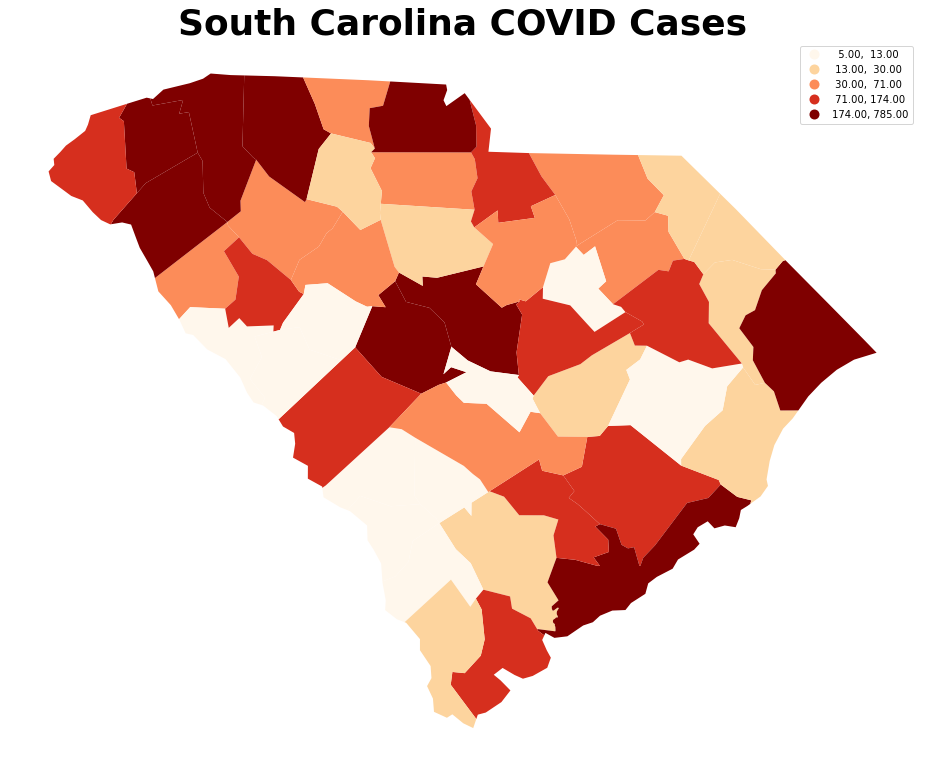

In [14]:
# Make map
fig = plt.figure(figsize=(1280/72, 720/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree(),
                  frameon=False)
ax.patch.set_visible(False)
ax.set_title('South Carolina COVID Cases', fontweight='bold', fontsize='36')

merge.plot(column='Count Confirmed Cases Suppressed if 1-4', cmap='OrRd', 
           scheme='quantiles', legend=True,
           figsize=(1280/72, 720/72), 
           ax=ax)
